<a href="https://colab.research.google.com/github/Divyesh-2598/Image-Classification/blob/master/Complete_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
!unzip -q "/content/Train.zip"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from PIL import Image

In [0]:
train_dir="/content/Train"
test_dir=""

train_asthama= ['/content/Train/{}'.format(i) for i in os.listdir(train_dir) if 'A' in i]
train_bronchitis=['/content/Train/{}'.format(i) for i in os.listdir(train_dir) if 'B' in i]
train_copd=['/content/Train/{}'.format(i) for i in os.listdir(train_dir) if 'C' in i]
train_ild=['/content/Train/{}'.format(i) for i in os.listdir(train_dir) if 'I' in i]
train_normal=['/content/Train/{}'.format(i) for i in os.listdir(train_dir) if 'N' in i]
train_pnuemonia=['/content/Train/{}'.format(i) for i in os.listdir(train_dir) if 'P' in i]

train_imgs=train_asthama+train_bronchitis+train_copd+train_ild+train_normal+train_pnuemonia
(train_imgs[:10])

['/content/Train/A52.jpg',
 '/content/Train/A67.jpg',
 '/content/Train/A50.jpg',
 '/content/Train/A14.jpg',
 '/content/Train/A1.jpg',
 '/content/Train/A20.jpg',
 '/content/Train/A38.jpg',
 '/content/Train/A32.jpg',
 '/content/Train/A35.jpg',
 '/content/Train/A30.jpg']

In [0]:
import random
random.shuffle(train_imgs)
for sample in train_imgs[:10]:
    print(sample)

/content/Train/P17.jpg
/content/Train/N1.jpg
/content/Train/I8.jpg
/content/Train/A45.jpg
/content/Train/I56.jpg
/content/Train/I9.jpg
/content/Train/B51.jpg
/content/Train/A7.jpg
/content/Train/A15.jpg
/content/Train/A58.jpg


In [0]:
#train_labels = [fn.split('/')[-1].split('.')[0].split('\d+')[0] for fn in train_imgs]
#train_labels

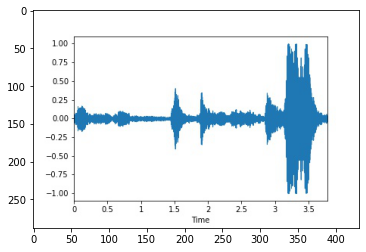

In [0]:
import matplotlib.image as mpimg 
for imgs in train_imgs[:1]:
  img=mpimg.imread(imgs)
  plt.imshow(img)
  plt.show()

In [0]:
nrows=224
ncols=224
channel=3

In [0]:
import cv2
X=[]
y=[]

for i in train_imgs:
  X.append(cv2.resize(cv2.imread(i,cv2.IMREAD_COLOR), (nrows,ncols), interpolation=cv2.INTER_CUBIC))
  if 'A' in i:
    y.append(0)
  elif 'B' in i:
    y.append(1)
  elif 'C' in i:
    y.append(2)
  elif 'I' in i:
    y.append(3)
  elif 'N' in i:
    y.append(4)
  elif 'P' in i:
    y.append(5)

In [0]:
X=np.array(X)/255
y=np.array(y)

print(X.shape)
print(y.shape)

(389, 224, 224, 3)
(389,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'label for categories')

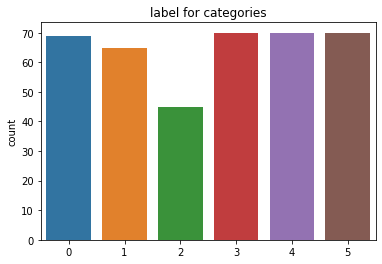

In [0]:
import seaborn as sns
sns.countplot(y)
plt.title('label for categories')

In [0]:
from sklearn.model_selection import train_test_split
(X_train, X_val, y_train, y_val) = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
INIT_LR = 1
EPOCHS = 12
BS = 10
trainAug = ImageDataGenerator(rotation_range=50, fill_mode="nearest", zoom_range=0.3, width_shift_range=0.2, 
                              height_shift_range=0.2, shear_range=0.2, horizontal_flip=True)

In [0]:
from keras import layers
from keras import models
#from keras.applications import VGG16
from keras.applications import MobileNet
vgg16_model = keras.applications.vgg16.VGG16()
#mobile_model = keras.applications.mobilenet.MobileNet()
vgg16_model.summary()
#mobile_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras.models import Sequential
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
#freeze the weights of layers
for layer in model.layers:
  layers.trainable = False


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
from keras import optimizers
#sgd = optimizers.SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS, momentum=0.9, nesterov=True)
#adam = optimizers.Adam(lr=INIT_LR, beta_1=0.9, beta_2=0.999, amsgrad=False)
rmsprop=optimizers.RMSprop(lr=INIT_LR, rho=0.9)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
History = model.fit_generator(trainAug.flow(X_train, y_train, batch_size=BS), steps_per_epoch=len(X_train) // BS, 
                        validation_data=(X_val, y_val), validation_steps=len(X_val) // BS, epochs=EPOCHS)

Epoch 1/12
31/31 [==============================] - 644s 21s/step - loss: 5221756.6441 - acc: 0.1761 - val_loss: 2.0424 - val_acc: 0.2179
Epoch 2/12
31/31 [==============================] - 641s 21s/step - loss: 2.9732 - acc: 0.1927 - val_loss: 2.8590 - val_acc: 0.1154
Epoch 3/12
31/31 [==============================] - 640s 21s/step - loss: 2.8057 - acc: 0.1661 - val_loss: 4.0060 - val_acc: 0.2179
Epoch 4/12
31/31 [==============================] - 642s 21s/step - loss: 6.3712 - acc: 0.1528 - val_loss: 5.6509 - val_acc: 0.1282
Epoch 5/12
31/31 [==============================] - 642s 21s/step - loss: 5.6436 - acc: 0.1661 - val_loss: 1.9346 - val_acc: 0.1410
Epoch 6/12
31/31 [==============================] - 639s 21s/step - loss: 2.1340 - acc: 0.1927 - val_loss: 2.1299 - val_acc: 0.1282
Epoch 7/12
31/31 [==============================] - 656s 21s/step - loss: 2.1436 - acc: 0.1516 - val_loss: 2.5920 - val_acc: 0.1282
Epoch 8/12
31/31 [==============================] - 621s 20s/step - lo

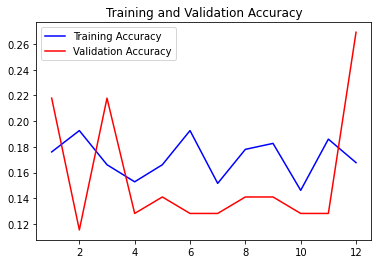

In [0]:
acc = History.history['acc']
val_acc = History.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

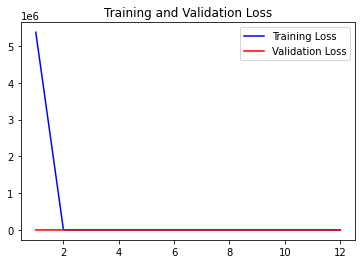

In [0]:
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [0]:
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/P.jpg78.jpg')])
print(predictions[0])

[0.0000000e+00 1.4574371e-28 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00]


In [0]:
''